In [1]:
import numpy as np
import hockey.hockey_env as h_env
import gymnasium as gym
from importlib import reload
import time

In [2]:
np.set_printoptions(suppress=True)

In [3]:
reload(h_env)

C:\Users\pi030\Documents\Uni\ReinforcementLearning\finalProject\RLenv.venv\lib\site-packages\gymnasium\envs\registration.py:642: UserWarning: WARN: Overriding environment Hockey-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
C:\Users\pi030\Documents\Uni\ReinforcementLearning\finalProject\RLenv.venv\lib\site-packages\gymnasium\envs\registration.py:642: UserWarning: WARN: Overriding environment Hockey-One-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


<module 'hockey.hockey_env' from 'C:\\Users\\pi030\\Documents\\Uni\\ReinforcementLearning\\finalProject\\RLenv.venv\\lib\\site-packages\\hockey\\hockey_env.py'>

# Normal Game Play

In [4]:
env = h_env.HockeyEnv()

have a look at the initialization condition: alternating who starts and are random in puck position

In [5]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
_ = env.render()

one episode with random agents

In [6]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()

for _ in range(600):
    env.render(mode="human")
    a1 = np.random.uniform(-1,1,4)
    a2 = np.random.uniform(-1,1,4)    
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d or t: break

Without rendering, it runs much faster

"info" dict contains useful proxy rewards and winning information

In [7]:
info, env.get_info_agent_two()

({'winner': 0,
  'reward_closeness_to_puck': -0.12005649408108868,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': 0.0},
 {'winner': 0,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': -0.0})

Winner == 0: draw

Winner == 1: you (left player)

Winner == -1: opponent wins (right player)

In [8]:
env.close()

# Train Shooting

In [ ]:
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_SHOOTING)

In [ ]:
o, info = env.reset()
_ = env.render()

for _ in range(50):
    env.render()
    a1 = [1,0,0,1] # np.random.uniform(-1,1,4)
    a2 = [0,0.,0,0] 
    obs, r, d, t , info = env.step(np.hstack([a1,a2]))
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [ ]:
env.close()

# Train DEFENDING

In [ ]:
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_DEFENSE)

In [ ]:
o, info = env.reset()
_ = env.render()

for _ in range(60):
    env.render()
    a1 = [0.1,0,0,1] # np.random.uniform(-1,1,3)
    a2 = [0,0.,0,0] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))
    print(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [ ]:
env.close()

# Using discrete actions

In [ ]:
import random

In [ ]:
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_SHOOTING)

In [ ]:
env.reset()
for _ in range(251):
    env.render()
    a1_discrete = random.randint(0,7)
    a1 = env.discrete_to_continous_action(a1_discrete)
    a2 = [0,0.,0,0 ] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [ ]:
env.close()

# Hand-crafted Opponent

In [9]:
env = h_env.HockeyEnv()

In [10]:
o, info = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent()

In [ ]:
obs_buffer = []
reward_buffer=[]
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
for _ in range(251):
    env.render()
    a1 = player1.act(obs)
    a2 = player2.act(obs_agent2)
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_buffer.append(obs)
    reward_buffer.append(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)

In [ ]:
np.mean(obs_buffer,axis=0)

In [ ]:
np.std(obs_buffer,axis=0)

If you want to use a fixed observation scaling, this might be a reasonable choice

In [ ]:
scaling = [ 1.0,  1.0 , 0.5, 4.0, 4.0, 4.0,  
            1.0,  1.0,  0.5, 4.0, 4.0, 4.0,  
            2.0, 2.0, 10.0, 10.0, 4,0 ,4,0]

In [ ]:
import pylab as plt

In [ ]:
plt.plot(obs_buffer[:,2])
plt.plot(obs_buffer[:,8])

In [ ]:
plt.plot(obs_buffer[:,12])

In [ ]:
plt.plot(reward_buffer[:])

In [ ]:
np.sum(reward_buffer)

In [ ]:
info2 = env.get_info_agent_two()
info, info2, env.get_reward(info), env.get_reward_agent_two(info2)

In [11]:
env.close()

# Human Opponent

In [55]:
env = h_env.HockeyEnv()

In [56]:
player1 = h_env.BasicOpponent()
player2 = h_env.HumanOpponent(env=env, player=2)


Human Controls:
 left:			left arrow key left
 right:			arrow key right
 up:			arrow key up
 down:			arrow key down
 tilt clockwise:	w
 tilt anti-clockwise:	s
 shoot :	space


In [57]:
obs, info = env.reset()

env.render()
time.sleep(1)
obs_agent2 = env.obs_agent_two()
for _ in range(100):
    time.sleep(0.2)
    env.render()
    a1 = player1.act(obs) 
    a2 = player2.act(obs_agent2)
    obs, r, d, _, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: 
        winner = info['winner']
        if winner == 0:
            print("Draw")
        elif winner == 1:
            print("Player 1 won")
        else:
            print("Player 2 won")
        break

Player 1 won


In [58]:
env.close()

# Test trained agent

In [60]:
import sys
# add path to DDPG_Hockey 
sys.path.append(r"C:\Users\pi030\Documents\Uni\ReinforcementLearning\finalProject\code\RL_Project\DDPG_Hockey")
import DDPG

In [62]:
env = h_env.HockeyEnv()

In [63]:
o, info = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=True)
player2 = DDPG.DDPGOpponent()

C:\Users\pi030\Documents\Uni\ReinforcementLearning\finalProject\code\RL_Project\DDPG_Hockey\DDPG.py:505: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.agent.restore_sta

In [69]:
obs_buffer = []
reward_buffer=[]
obs2_buffer = []
winner_buffer = []
reward2_buffer=[]
playtime_buffer=[]

for game in range(200):
    obs, info = env.reset()
    obs_agent2 = env.obs_agent_two()
    for _ in range(500):  # only 250 steps possible because of hockeyEnv
        # env.render()
        a1 = player1.act(obs)
        a2 = player2.act(obs_agent2)
#        a1 = np.random.uniform(-1,1,4)
#        a2 = np.random.uniform(-1,1,4)    
        obs, r, d, t, info = env.step(np.hstack([a1,a2]))
        info2 = env.get_info_agent_two()
        r2 = env.get_reward_agent_two(info2)
        obs_buffer.append(obs)
        obs_agent2 = env.obs_agent_two()
        obs2_buffer.append(obs_agent2)
        reward_buffer.append(r)
        reward2_buffer.append(r2)
        if d or t:
            winner = info["winner"]
            winner_buffer.append(winner)
            playtime_buffer.append(_)
            print(f"length of game: {_}     winner: {winner}")
            break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)
obs2_buffer = np.asarray(obs2_buffer)
reward2_buffer = np.asarray(reward2_buffer)
playtime_buffer = np.asarray(playtime_buffer)
print(obs_buffer.shape)

length of game: 250     winner: 0
length of game: 30     winner: 1
length of game: 250     winner: 0
length of game: 178     winner: 1
length of game: 250     winner: 0
length of game: 36     winner: 1
length of game: 250     winner: 0
length of game: 250     winner: 0
length of game: 250     winner: 0
length of game: 41     winner: 1
length of game: 250     winner: 0
length of game: 204     winner: 1
length of game: 250     winner: 0
length of game: 78     winner: -1
length of game: 250     winner: 0
length of game: 88     winner: 1
length of game: 250     winner: 0
length of game: 42     winner: 1
length of game: 250     winner: 0
length of game: 250     winner: 0
length of game: 250     winner: 0
length of game: 52     winner: 1
length of game: 250     winner: 0
length of game: 51     winner: 1
length of game: 250     winner: 0
length of game: 247     winner: 1
length of game: 250     winner: 0
length of game: 250     winner: 0
length of game: 250     winner: 0
length of game: 250  

In [22]:
obs_buffer.shape

(34166, 18)

In [12]:
np.mean(obs_buffer,axis=0)

array([-1.49368929,  0.10950424, -0.00239489,  0.31495514,  0.03531004,
       -0.00134137,  0.66269671, -2.63610441, -0.99400226, -0.76543737,
       -0.87187936, -0.30231167,  0.90051244,  0.21288029,  0.75762797,
        0.06016161,  0.37089612,  0.09840357])

In [17]:
(np.std(obs_buffer,axis=0) - np.std(obs2_buffer,axis=0)) / np.std(obs_buffer,axis=0)

array([-0.00430787, -0.00838235,  0.00007652, -0.00395388,  0.00116347,
        0.00352539,  0.00428939,  0.00831267, -0.00007653,  0.0039383 ,
       -0.00116482, -0.00353786,  0.        ,  0.        ,  0.        ,
        0.        , -0.00897015,  0.00889041])

In [23]:
np.mean(winner_buffer,axis=0)

np.float64(0.39)

In [20]:
np.std(winner_buffer,axis=0)

np.float64(0.807462692636632)

In [24]:
np.sum(reward_buffer), np.sum(reward2_buffer)

(np.float64(1151.9914126589251), np.float64(-6191.900678166345))

In [26]:
np.mean(playtime_buffer)

np.float64(169.83)

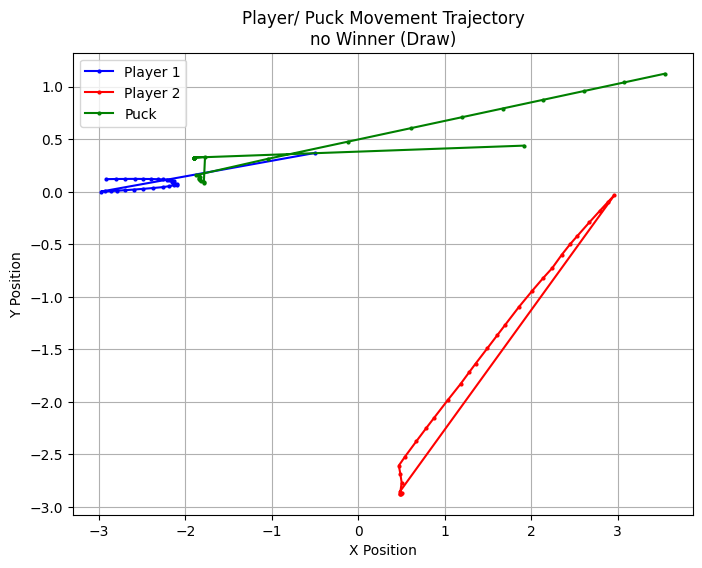

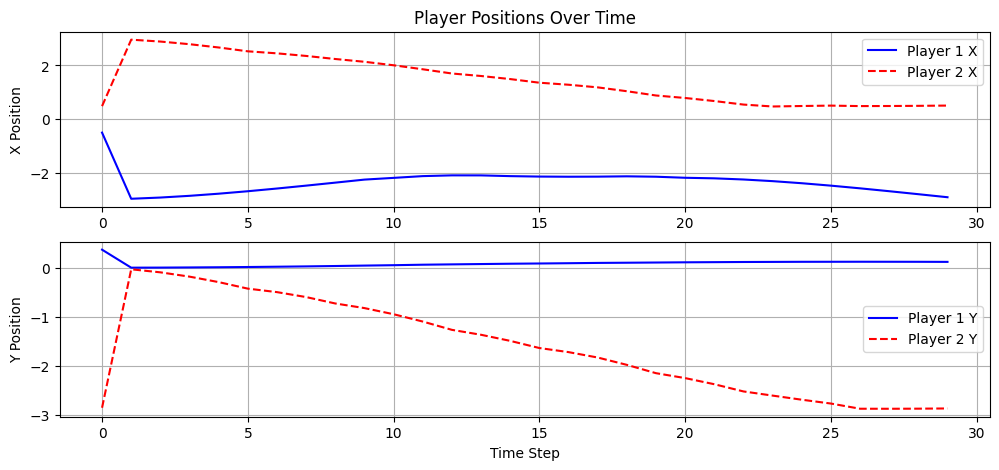

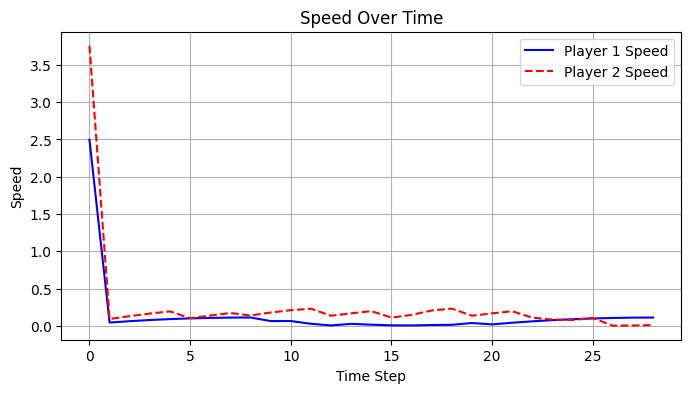

In [72]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pylab as plt
import matplotlib.pyplot as plt

# analyse data of one specific game
game_number = 2
winner = winner_buffer[game_number]

# take observations of only that game
start_idx = sum(playtime_buffer[:game_number - 1])  # Start index (sum of previous games' steps)
end_idx = start_idx + playtime_buffer[game_number - 1]  # End index
observations = obs_buffer[start_idx:end_idx]  # Slice obs_buffer

# Extract player 1 positions
x_player1 = observations[:, 0]  # X position of player 1
y_player1 = observations[:, 1]  # Y position of player 1

# Extract player 2 positions
x_player2 = observations[:, 6]  # X position of player 2
y_player2 = observations[:, 7]  # Y position of player 2

# Extract puck data
puck_x = observations[:, 12]
puck_y = observations[:, 13]
puck_time_p1 = observations[:, 16]
puck_time_p2 = observations[:, 17]

# Compute speed for both players
dx1 = np.diff(x_player1)
dy1 = np.diff(y_player1)
speed_player1 = np.sqrt(dx1**2 + dy1**2)

dx2 = np.diff(x_player2)
dy2 = np.diff(y_player2)
speed_player2 = np.sqrt(dx2**2 + dy2**2)

# Compute speed puck
dx3 = np.diff(puck_x)
dy3 = np.diff(puck_y)
speed_puck = np.sqrt(dx3**2 + dy3**2)

# Create time axis
time_steps = np.arange(len(x_player1))  # Time steps for plotting

plt.close()
# ---- PLOT 1: Player movement trajectory ----
plt.figure(figsize=(8, 6))
plt.plot(x_player1, y_player1, label="Player 1", color='blue', marker='o', markersize=2, linestyle='-')
plt.plot(x_player2, y_player2, label="Player 2", color='red', marker='o', markersize=2, linestyle='-')
plt.plot(puck_x, puck_y, label="Puck", color='green', marker='o', markersize=2, linestyle='-')
plt.xlabel("X Position")
plt.ylabel("Y Position")
if winner == 0:
    plt.title("Player/ Puck Movement Trajectory\nno Winner (Draw)")
else:
    plt.title(f"Player/ Puck Movement Trajectory\nWinner: Player {winner}")
plt.legend()
plt.grid(True)
plt.show()

# ---- PLOT 2: X & Y Positions over time ----
plt.figure(figsize=(12, 5))
plt.subplot(2, 1, 1)
plt.plot(time_steps, x_player1, label="Player 1 X", color='blue')
plt.plot(time_steps, x_player2, label="Player 2 X", color='red', linestyle='dashed')
plt.ylabel("X Position")
plt.title("Player Positions Over Time")
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time_steps, y_player1, label="Player 1 Y", color='blue')
plt.plot(time_steps, y_player2, label="Player 2 Y", color='red', linestyle='dashed')
plt.xlabel("Time Step")
plt.ylabel("Y Position")
plt.legend()
plt.grid(True)
plt.show()

# ---- PLOT 3: Speed over time ----
plt.figure(figsize=(8, 4))
plt.plot(time_steps[:-1], speed_player1, label="Player 1 Speed", color='blue')
plt.plot(time_steps[:-1], speed_player2, label="Player 2 Speed", color='red', linestyle='dashed')
plt.xlabel("Time Step")
plt.ylabel("Speed")
plt.title("Speed Over Time")
plt.legend()
plt.grid(True)
plt.show()




In [73]:
env.close()